In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import json
import os
from pprint import pprint
from sklearn.svm import SVR
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.model_selection import GridSearchCV

In [2]:
def rotate_vec(vec,deg):
    rotmat = np.array([ [0,-1],[1,0] ])
    
    
    if deg==180:
        rotmat = rotmat.dot(rotmat)
    elif deg==270:
        rotmat == rotmat.dot(rotmat).dot(rotmat)
    elif deg>270 :
        raise('Not standard rotation')
        
    return vec.dot(rotmat)


In [3]:
def vec_data(imageData):
    return np.array ( [-1.0*imageData[1]['x'] , -1.0*imageData[1]['y'] ])
                       

In [4]:
img = cv2.imread('regression/1a15ae96-38b7-4612-b0cd-91c0859a81b1.jpg')
#img = cv2.resize(img,None,fx=0.3, fy=0.3, interpolation = cv2.INTER_AREA)
# Initiate STAR detector
orb = cv2.ORB_create()
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
surf = cv2.xfeatures2d.SURF_create()


In [5]:
 #compute the descriptors with ORB
kp, des = surf.detectAndCompute(img, None)

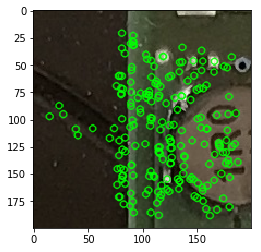

(<matplotlib.image.AxesImage at 0x7fd901b119e8>, None)

In [6]:


# draw only keypoints location,not size and orientation
outImg = 0;
img2 = cv2.drawKeypoints(img,kp,color=(0,255,0),outImage=outImg, flags=0)
plt.imshow(img2),plt.show()

In [7]:
all_desc = np.array([[]])
big_desc = np.array([[]])

bow = cv2.BOWKMeansTrainer(300)
bigbow = cv2.BOWKMeansTrainer(500)

print(bow)

for file in os.listdir("./"):
    if file.endswith(".txt"):
        #print(file)
        with open(file) as data_file:    
            data = json.load(data_file)
        #pprint(data[0][1])
        
        img_file = file.rstrip('-data.txt')
        big_hdd_img = cv2.imread(img_file)
        kp, des = surf.detectAndCompute(big_hdd_img,None)
        if des is not None:
            bigbow.add(des)
        
        
        for imageData in data:
            #print (imageData[0])
            lever_img = cv2.imread('regression/' + imageData[0])
            
            
            #lever_img = cv2.resize(lever_img,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_AREA)

            rotated_img = lever_img

            kp, des = surf.detectAndCompute(rotated_img, None)

            if des is None:
                plt.imshow(rotated_img);plt.show()
                continue


            bow.add(des)
            all_desc = np.append(all_desc,des)
            #print(all_desc.shape)
            outImg = 0;

            # draw only keypoints location,not size and orientation
            #img2 = cv2.drawKeypoints(rotated_img,kp,color=(0,255,0),outImage=outImg, flags=0)
            #plt.imshow(img2),plt.show()


<BOWKMeansTrainer 0x7fd901b10bb0>


In [8]:
dictionary = bow.cluster()

bow_extractor = cv2.BOWImgDescriptorExtractor(cv2.xfeatures2d.SURF_create(), cv2.BFMatcher(cv2.NORM_L2))
bow_extractor.setVocabulary(dictionary)
print(np.shape(dictionary))

(300, 64)


In [ ]:
big_dictionary = bigbow.cluster()

bigbow_extractor = cv2.BOWImgDescriptorExtractor(cv2.xfeatures2d.SURF_create(), cv2.BFMatcher(cv2.NORM_L2))
bigbow_extractor.setVocabulary(big_dictionary)
print(np.shape(big_dictionary))



In [ ]:
print(bowdes.shape)
print(bigbowdes.shape)



In [11]:
train_desc = []
train_label = []
train_label_y = []


for file in os.listdir("./"):
    if file.endswith(".txt"):
        #print(file)

        with open(file) as data_file:    
            data = json.load(data_file)
        
        img_file = file.rstrip('-data.txt')
        big_hdd_img = cv2.imread(img_file)
        bigbowdes = bigbow_extractor.compute(big_hdd_img,surf.detect(big_hdd_img))

        
        for imageData in data:
            lever_img = cv2.imread('regression/' + imageData[0])

            rotated_img = lever_img
            bowdes = bow_extractor.compute(rotated_img,surf.detect(rotated_img))

            if bowdes is None:
                continue                    
            
            myvec = rotate_vec(vec_data(imageData),90)
            print(myvec)
            
            train_label.append(myvec[0])
            train_label_y.append(myvec[1])

            
            conc_des = np.concatenate((bowdes,bigbowdes), axis=1)
            train_desc.extend(conc_des)
            #print(imageData[1]['x'])
                

#print(train_label)
#print(np.shape(train_desc))

[-0.96689441 -0.2551768 ]
[-0.96689441 -0.2551768 ]
[-0.96689441 -0.2551768 ]
[-0.96689441 -0.2551768 ]
[-0.997974    0.06362311]
[-0.9979828   0.06348491]
[-0.99211169  0.12535707]
[-0.99211169  0.12535707]
[-0.99211169  0.12535707]
[-0.87773347 -0.47914919]
[-0.99886814 -0.04756515]
[-0.99886814 -0.04756515]
[-0.99886814 -0.04756515]
[-0.99886814 -0.04756515]
[-0.92890892 -0.37030828]
[-0.9997429  -0.02267458]
[-0.9997429  -0.02267458]
[-0.9997429  -0.02267458]
[-0.9997429  -0.02267458]
[-0.93958058  0.34232781]
[-0.93958058  0.34232781]
[-0.93958058  0.34232781]
[-0.93958058  0.34232781]
[-0.93958058  0.34232781]
[-0.93958058  0.34232781]
[-0.99987602  0.01574608]
[-1.  0.]
[-1.  0.]
[-1.  0.]
[-1.  0.]
[-0.87862451 -0.47751332]
[-0.99584155  0.09110222]
[-0.99584155  0.09110222]
[-0.99584155  0.09110222]
[-0.01321471  0.99991268]
[-0.01321471  0.99991268]
[-0.01321471  0.99991268]
[ 0.08762462  0.99615357]
[ 0.08762462  0.99615357]
[-0.69977983 -0.71435858]
[-0.69977983 -0.71435858

In [14]:
test_desc = []
test_label = []
test_label_y = []
for file in os.listdir("./"):
    if file.endswith(".test"):
        #print(file)
        with open(file) as test_data_file:
            test_data = json.load(test_data_file)
        
        img_file = file.rstrip('-data.txt.test')
        big_hdd_img = cv2.imread(img_file)
        bigbowdes = bigbow_extractor.compute(big_hdd_img,surf.detect(big_hdd_img))
        
        for testImgData in test_data:
            
            test_img = cv2.imread('regression/' + testImgData[0])

            rotated_img = test_img
            
            testvec = rotate_vec(vec_data(testImgData),90)
            
            test_label.append(testvec[0])
            test_label_y.append(testvec[1])

            bowdes = bow_extractor.compute(rotated_img,surf.detect(rotated_img))
            
            conc_des = np.concatenate((bowdes,bigbowdes), axis=1)
            test_desc.extend(conc_des)
#test_label

In [12]:
k=['rbf', 'linear','poly','sigmoid']
c= range(1,100)
g=np.arange(1e-4,1e-2,0.0001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
#print (param_grid)

In [13]:
print("Hello")
#svr=SVR()
#grid = GridSearchCV(svr, param_grid, cv=5,scoring='neg_mean_squared_error')
#grid.fit(train_desc, train_label)

Hello


In [96]:
print()
print("Grid scores on development set:")
print()  
#print (grid.grid_scores_)  
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print("Grid best score:")
print()
#print (grid.best_score_)
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
#print (grid_mean_scores)


Grid scores on development set:

Best parameters set found on development set:



NameError: name 'grid' is not defined

In [101]:
svr_rbf = SVR(kernel='rbf', C=85, gamma=0.0187)


#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
x_rbf = svr_rbf.fit(train_desc, train_label).predict(test_desc)
y_rbf = svr_rbf.fit(train_desc,train_label_y).predict(test_desc)
#y_lin = svr_lin.fit(train_desc, train_label).predict(test_desc)
#y_poly = svr_poly.fit(train_desc, train_label).predict(test_desc)

In [102]:
#print(x_rbf)
#print(test_label)
#print(test_label_y)
#print(y_lin)
#print(y_poly)

xmse = mean_squared_error(y_pred=x_rbf, y_true=test_label)

ymse = mean_squared_error(y_pred=y_rbf, y_true=test_label_y)

print (xmse )
print(ymse)

x_errors = x_rbf - test_label
y_errors = y_rbf - test_label_y

0.137905043926
0.387061040922


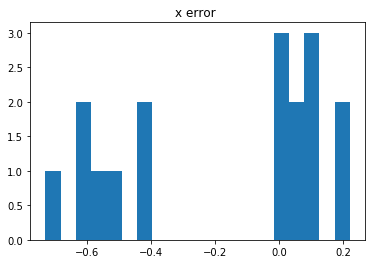

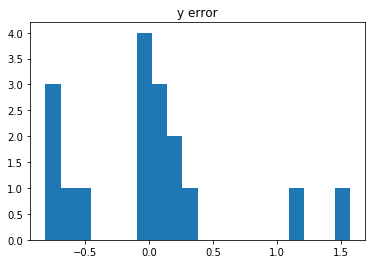

In [103]:
plt.hist(x_errors, bins=20)  # arguments are passed to np.histogram
plt.title("x error ")
plt.show()

plt.hist(y_errors, bins=20)  # arguments are passed to np.histogram
plt.title("y error")
plt.show()